In [3]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt


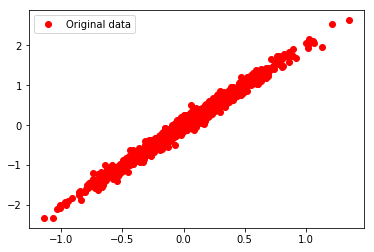

In [4]:
num_points = 100
vectors_set = []
for i in range(1000):
    train_X = np.random.normal(0.0,0.4)
    train_Y = 2 * train_X + np.random.normal(0.0,0.1) 
    vectors_set.append([train_X,train_Y])

x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]
plt.plot(x_data,y_data,'ro',label = 'Original data')
plt.legend(loc='best')
plt.show()

epoch 1 cost= 0.29645115 w= [-0.6255411] b= [0.00471315]
epoch 51 cost= 0.040044162 w= [1.4179941] b= [0.00510448]
epoch 101 cost= 0.013959548 w= [1.8748083] b= [0.00021142]
epoch 151 cost= 0.009965416 w= [1.9769369] b= [-0.00088258]
epoch 201 cost= 0.009164319 w= [1.9997692] b= [-0.00112716]
epoch 251 cost= 0.008989803 w= [2.004874] b= [-0.00118184]
epoch 301 cost= 0.0089510195 w= [2.0060153] b= [-0.00119406]
epoch 351 cost= 0.00894236 w= [2.0062704] b= [-0.0011968]
epoch 401 cost= 0.008940432 w= [2.0063272] b= [-0.00119741]
epoch 451 cost= 0.008940004 w= [2.0063398] b= [-0.00119755]
cost= 0.008940004 W= [2.0063398] b= [-0.00119754]


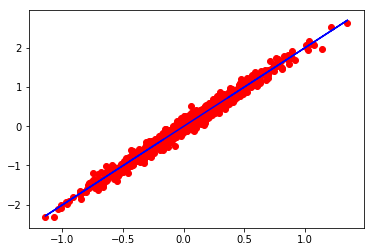

In [5]:
with tf.name_scope('inputs'):
    x = tf.placeholder('float',name='xs')
    y = tf.placeholder('float',name='ys')
with tf.name_scope('layer'):
    w = tf.Variable(tf.random_normal([1]),name='wegight')
    b = tf.Variable(tf.zeros((1)),name='bias')
    z = x*w+b
with tf.name_scope('cost'):
    cost = tf.reduce_mean(tf.square(y-z),name='cost')
learining_rate = 0.1

with tf.name_scope('train'):
    optimizer = tf.train.GradientDescentOptimizer(learining_rate).minimize(cost)
sess = tf.Session()
writer = tf.summary.FileWriter('logs/', sess.graph) 
sess.run(tf.global_variables_initializer())

training_epochs = 500
display_step = 50

for epoch in range(training_epochs):
    sess.run(optimizer,feed_dict={x:x_data,y:y_data})
    if epoch % display_step == 0:
        loss = sess.run(cost,feed_dict={x: train_X, y:train_Y})
        print('epoch',epoch+1,'cost=',loss,'w=',sess.run(w),'b=',sess.run(b))
#     print('finished')
print ("cost=", sess.run(cost, feed_dict={x: train_X, y: train_Y}), "W=", sess.run(w), "b=", sess.run(b))
plt.scatter(x_data,y_data,c='r')
plt.plot(x_data,sess.run(w)*x_data+sess.run(b),c='b')
plt.show()


In [5]:
train_X

-0.5136217018856155